# Fixed Effects

ECON526

Paul Schrimpf (University of British Columbia)

# Introduction

## Panel Data

-   Units $i=1,..., n$
    -   Ex: people, firms, cities, countries
-   Time $t=1,..., T$
-   Observe $\left\{(y_{it}, X_{it})\right\}_{i=1,t=1}^{n,T}$

## Linear Model

-   Model $$
    y_{it} = X_{it}'\beta + \overbrace{U_i'\gamma + \epsilon_{it}}^{\text{unobserved}}
    $$

    -   Time invariant confounders $U_i$

-   Subtract individual averages $$
    \begin{align*}
    y_{it} - \bar{y}_i & = (X_{it} - \bar{X}_i)'\beta + (\epsilon_{it} -
                       \bar{\epsilon}_i) \\
    \ddot{y}_{it} & = \ddot{X}_{it}' \beta + \ddot{\epsilon}_{it}
    \end{align*}
    $$

-   Equivalent to estimating with individual dummies $$
    y_{it} = X_{it}'\beta + \alpha_i + \epsilon_{it}
    $$

-   Eliminates $U_i$ and any time invariant observed $X_i$

# Mechanics of Fixed Effects

$$
\def\Er{{\mathrm{E}}}
\def\En{{\mathbb{E}_n}}
\def\cov{{\mathrm{Cov}}}
\def\var{{\mathrm{Var}}}
\def\R{{\mathbb{R}}}
\newcommand\norm[1]{\left\lVert#1\right\rVert}
\def\rank{{\mathrm{rank}}}
\newcommand{\inpr}{ \overset{p^*_{\scriptscriptstyle n}}{\longrightarrow}}
\def\inprob{{\,{\buildrel p \over \rightarrow}\,}}
\def\indist{\,{\buildrel d \over \rightarrow}\,}
\DeclareMathOperator*{\plim}{plim}
$$

## OLS

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
style.use("fivethirtyeight")

[1]

[1] Code from Facure (2022)

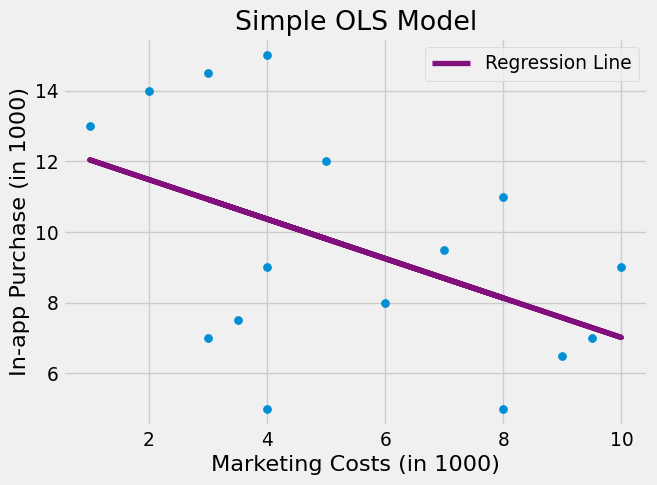

In [2]:
toy_panel = pd.DataFrame({
    "mkt_costs":[5,4,3.5,3, 10,9.5,9,8, 4,3,2,1, 8,7,6,4],
    "purchase":[12,9,7.5,7, 9,7,6.5,5, 15,14.5,14,13, 11,9.5,8,5],
    "city":["C0","C0","C0","C0", "C2","C2","C2","C2", "C1","C1","C1","C1", "C3","C3","C3","C3"]
})

m = smf.ols("purchase ~ mkt_costs", data=toy_panel).fit()

plt.scatter(toy_panel.mkt_costs, toy_panel.purchase)
plt.plot(toy_panel.mkt_costs, m.fittedvalues, c="C5", label="Regression Line")
plt.xlabel("Marketing Costs (in 1000)")
plt.ylabel("In-app Purchase (in 1000)")
plt.title("Simple OLS Model")
plt.legend();

## Fixed Effects / Within

[1]

[1] Code from Facure (2022)

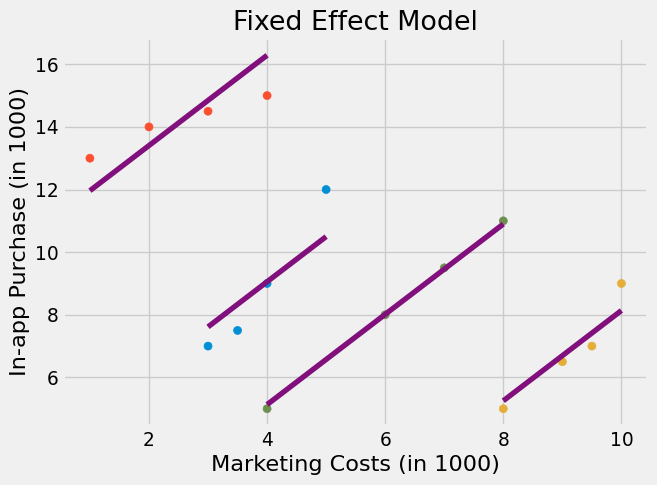

In [3]:
fe = smf.ols("purchase ~ mkt_costs + C(city)", data=toy_panel).fit()

fe_toy = toy_panel.assign(y_hat = fe.fittedvalues)

plt.scatter(toy_panel.mkt_costs, toy_panel.purchase, c=toy_panel.city)
for city in fe_toy["city"].unique():
    plot_df = fe_toy.query(f"city=='{city}'")
    plt.plot(plot_df.mkt_costs, plot_df.y_hat, c="C5")

plt.title("Fixed Effect Model")
plt.xlabel("Marketing Costs (in 1000)")
plt.ylabel("In-app Purchase (in 1000)");

# Some Theory

## Large $n$, Small $T$

-   Often $n>>T$
-   Usual analysis of fixed effects uses asymptotics with
    $n \to \infty$, $T$ fixed
    -   We will mostly stick to that, but if you have data with
        $n \approx T$, other approaches can be better

## Strict Exogeneity

-   In fixed effect model $$
    y_{it} - \bar{y}_i  = (X_{it} - \bar{X}_i)'\beta + (\epsilon_{it} - \bar{\epsilon}_i)
    $$ for $\hat{\beta}^{FE} \inprob \beta$, need
    $\Er[(X_{it} - \bar{X}_i)(\epsilon_{it} - \bar{\epsilon}_i)]=0$

-   I.e. $\Er[X_{it} \epsilon_{is}] = 0$ for all $t, s$

## Strict Exogeneity

-   Problematic with dynamics, e.g.
    -   $X_{it}$ including lagged $y_{it-1}$
    -   $X_{it}$ affected by past $y$
    -   “Nickell bias”
-   See Chen, Chernozhukov, and Fernández-Val (2019) for bias correction
    under weak exogeneity, $\Er[X_{it} \epsilon_{is}] = 0$ for
    $t \leq s$

## Standard Errors

-   Generally, good idea to use clustered standard errors, clustered on
    $i$
-   See MacKinnon, Nielsen, and Webb (2023) for guide to clustered
    standard errors

## Sources and Further Reading

-   Facure (2022) [chapter
    14](https://matheusfacure.github.io/python-causality-handbook/14-Panel-Data-and-Fixed-Effects.html)
-   Huntington-Klein (2021) [chapter
    16](https://theeffectbook.net/ch-FixedEffects.html)

## References

Chen, Shuowen, Victor Chernozhukov, and Iván Fernández-Val. 2019.
“Mastering Panel Metrics: Causal Impact of Democracy on Growth.” *AEA
Papers and Proceedings* 109 (May): 77–82.
<https://doi.org/10.1257/pandp.20191071>.

Facure, Matheus. 2022. *Causal Inference for the Brave and True*.
<https://matheusfacure.github.io/python-causality-handbook/landing-page.html>.

Huntington-Klein, Nick. 2021. *The Effect: An Introduction to Research
Design and Causality*. CRC Press. <https://theeffectbook.net/>.

MacKinnon, James G., Morten Ørregaard Nielsen, and Matthew D. Webb.
2023. “Cluster-Robust Inference: A Guide to Empirical Practice.”
*Journal of Econometrics* 232 (2): 272–99.
https://doi.org/<https://doi.org/10.1016/j.jeconom.2022.04.001>.